<a href="https://colab.research.google.com/github/Bevincent-Edward/ML-Projects/blob/main/IrisClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing modules

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [ ]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


The column ID is not necessary so it can be dropped!

In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:

df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Preprocessing the dataset

In [ ]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no Null Values

# Exploratory Data Analysis

<Axes: >

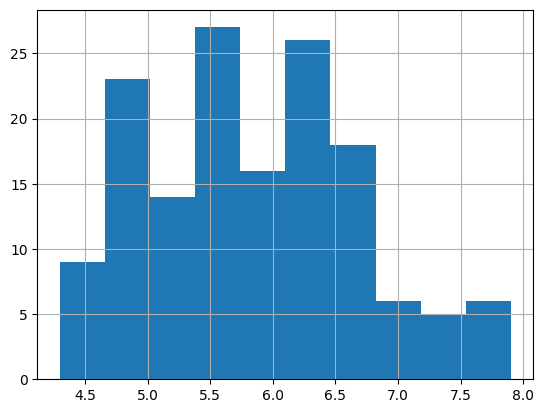

In [ ]:
df['SepalLengthCm'].hist()

<Axes: >

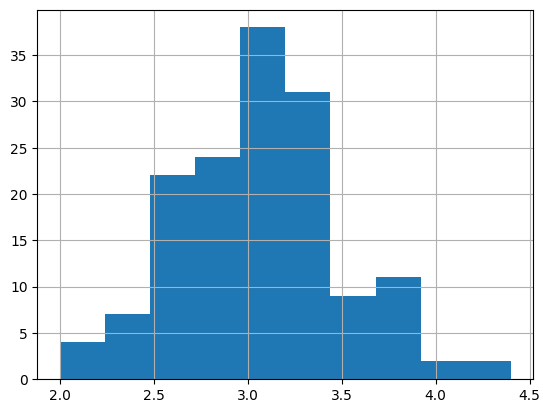

In [ ]:
df['SepalWidthCm'].hist()

<Axes: >

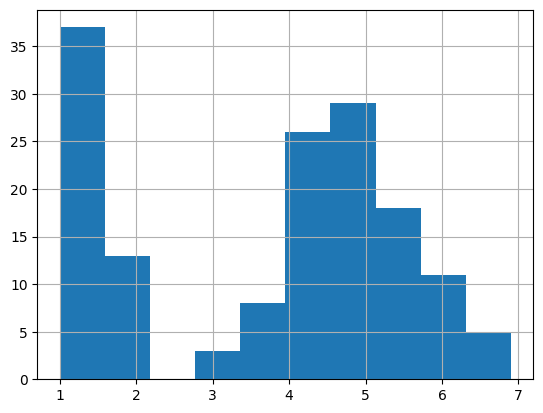

In [ ]:
df['PetalLengthCm'].hist()

<Axes: >

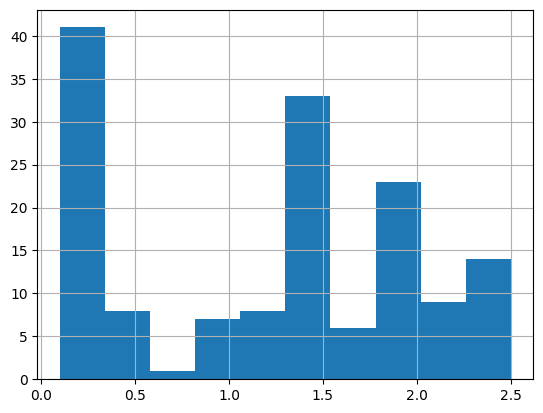

In [ ]:
df['PetalWidthCm'].hist()

In [ ]:
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

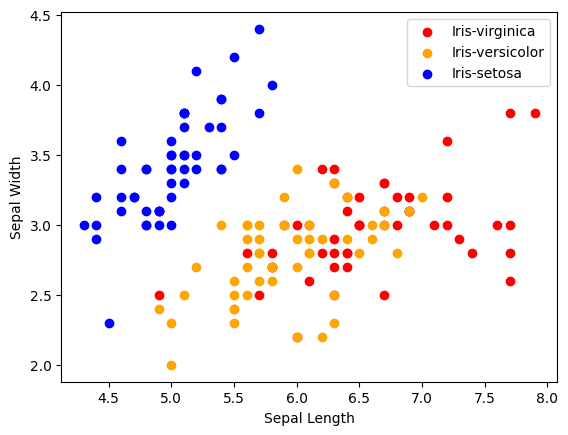

In [ ]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

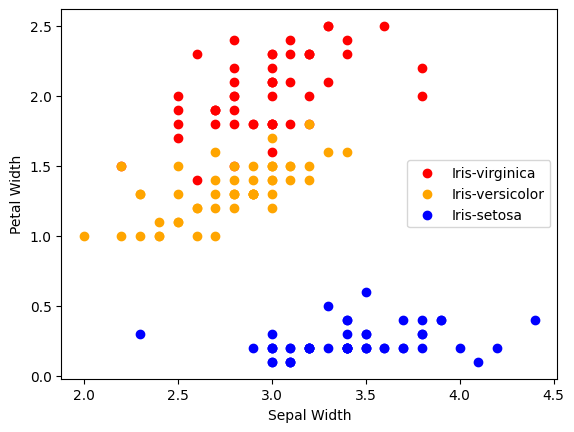

In [ ]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

# Coorelation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.

In [ ]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

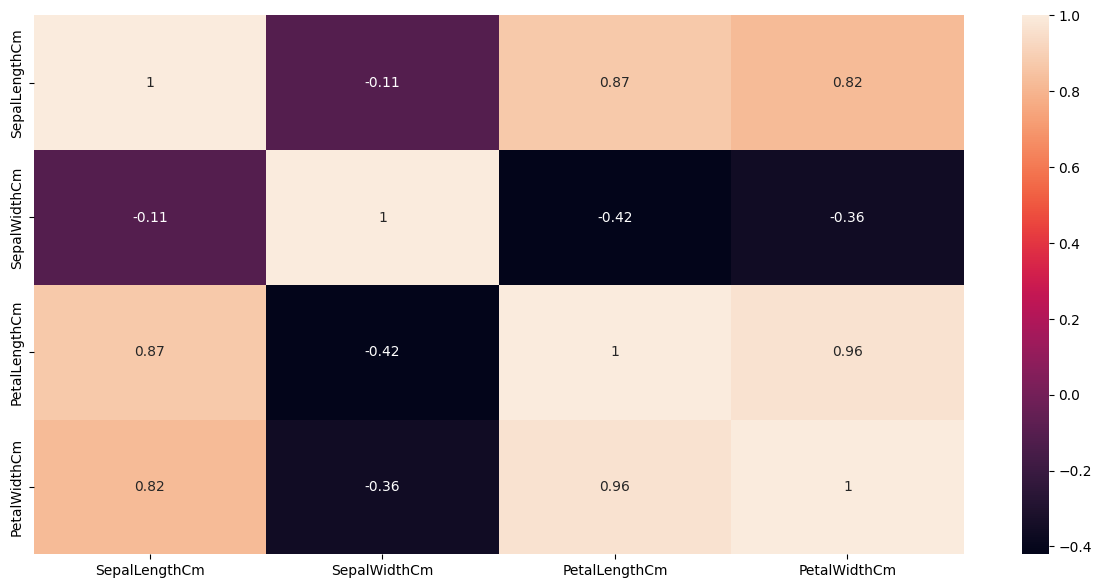

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(corr, annot=True)

# Label Encoder

In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier()

In [ ]:
model3.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
print("Accuracy: ",model3.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()

In [ ]:
model2.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
print("Accuracy: ",model2.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


**GradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model4=GradientBoostingClassifier()

In [ ]:
model4.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
print("Accuracy: ",model4.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


**Final Accuracy Tabulation of Models**

In [ ]:
final_data = pd.DataFrame({'Models':['LogisticRegressionR','KNN','DecisionTreeClassifier','GradientBoostingClassifier'],
              "Accuracy":[model.score(x_test, y_test) * 100,
                     model3.score(x_test, y_test) * 100,
                     model2.score(x_test, y_test) * 100,model4.score(x_test, y_test) * 100
                    ]})

In [ ]:
final_data

,Models,Accuracy
0,LogisticRegressionR,93.333333
1,KNN,95.555556
2,DecisionTreeClassifier,95.555556
3,GradientBoostingClassifier,97.777778


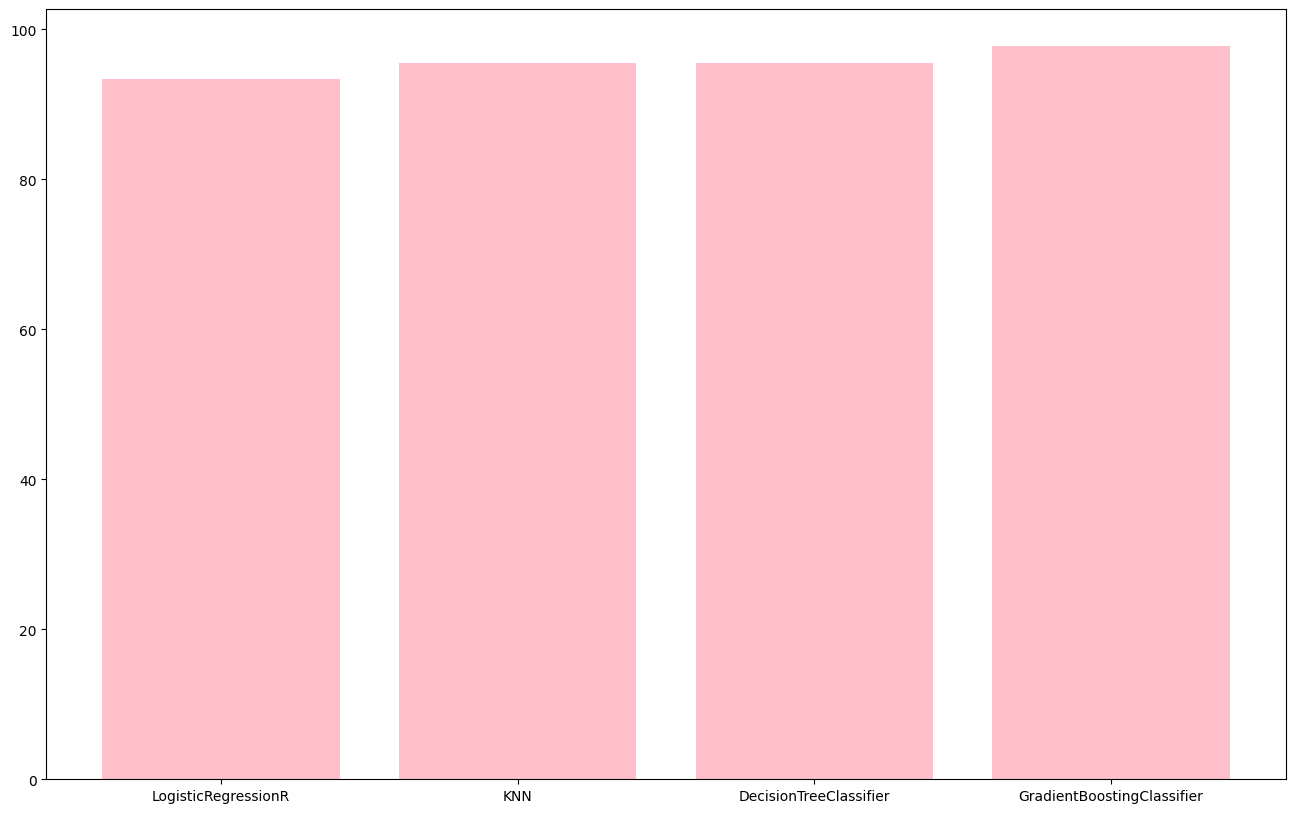

In [ ]:
plt.figure(figsize=[16,10])
plt.bar(final_data['Models'],final_data['Accuracy'],color='pink')
plt.show()